In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from numpy import array
from sklearn.model_selection import train_test_split

#Upload Data

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/indonesian hate speech/data.csv',encoding='latin')

In [ ]:
data

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13164,USER jangan asal ngomong ndasmu. congor lu yg ...,1,1,1,0,0,0,1,0,0,1,0,0
13165,USER Kasur mana enak kunyuk',0,1,0,0,0,0,0,0,0,0,0,0
13166,USER Hati hati bisu :( .g\n\nlagi bosan huft \...,0,0,0,0,0,0,0,0,0,0,0,0
13167,USER USER USER USER Bom yang real mudah terdet...,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
data = data.drop(['Abusive', 'HS_Individual', 'HS_Group','HS_Religion','HS_Race',
           'HS_Physical','HS_Gender','HS_Other','HS_Weak','HS_Moderate','HS_Strong'], axis=1)

In [ ]:
print(len(data))

13169


In [ ]:
data['HS'].value_counts()

0    7608
1    5561
Name: HS, dtype: int64

#Data Analysis

In [ ]:
data['word_count'] = data['Tweet'].apply(lambda x: len(x.split()))
data.head()

,Tweet,HS,word_count
0,- disaat semua cowok berusaha melacak perhatia...,1,25
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,21
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,37
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,14
4,USER USER Kaum cebong kapir udah keliatan dong...,1,14


In [ ]:
data['num_char'] = data['Tweet'].apply(lambda x: len(x))
data.head()

,Tweet,HS,word_count,num_char
0,- disaat semua cowok berusaha melacak perhatia...,1,25,138
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,21,120
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,37,254
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,14,75
4,USER USER Kaum cebong kapir udah keliatan dong...,1,14,89


In [ ]:
#Stopwords
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
stop_words = set(stopwords.words('indonesian'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
stop_words

{'ada',
 'adalah',
 'adanya',
 'adapun',
 'agak',
 'agaknya',
 'agar',
 'akan',
 'akankah',
 'akhir',
 'akhiri',
 'akhirnya',
 'aku',
 'akulah',
 'amat',
 'amatlah',
 'anda',
 'andalah',
 'antar',
 'antara',
 'antaranya',
 'apa',
 'apaan',
 'apabila',
 'apakah',
 'apalagi',
 'apatah',
 'artinya',
 'asal',
 'asalkan',
 'atas',
 'atau',
 'ataukah',
 'ataupun',
 'awal',
 'awalnya',
 'bagai',
 'bagaikan',
 'bagaimana',
 'bagaimanakah',
 'bagaimanapun',
 'bagi',
 'bagian',
 'bahkan',
 'bahwa',
 'bahwasanya',
 'baik',
 'bakal',
 'bakalan',
 'balik',
 'banyak',
 'bapak',
 'baru',
 'bawah',
 'beberapa',
 'begini',
 'beginian',
 'beginikah',
 'beginilah',
 'begitu',
 'begitukah',
 'begitulah',
 'begitupun',
 'bekerja',
 'belakang',
 'belakangan',
 'belum',
 'belumlah',
 'benar',
 'benarkah',
 'benarlah',
 'berada',
 'berakhir',
 'berakhirlah',
 'berakhirnya',
 'berapa',
 'berapakah',
 'berapalah',
 'berapapun',
 'berarti',
 'berawal',
 'berbagai',
 'berdatangan',
 'beri',
 'berikan',
 'berikut'

In [ ]:
len(stop_words)

757

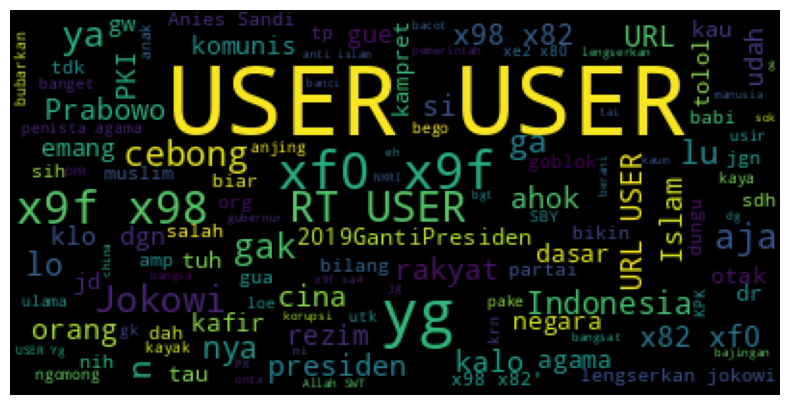

In [ ]:
#label 1 atau depresi
import wordcloud
from wordcloud import WordCloud, STOPWORDS

wordcloud = WordCloud(max_font_size=50, background_color="black",
            stopwords=stop_words)

cloud1 = wordcloud.generate(data.loc[data.HS==1, 'Tweet'].str.cat(sep='\n'))

plt.figure(figsize=(10,5))
plt.imshow(cloud1)
plt.axis("off")
plt.show()

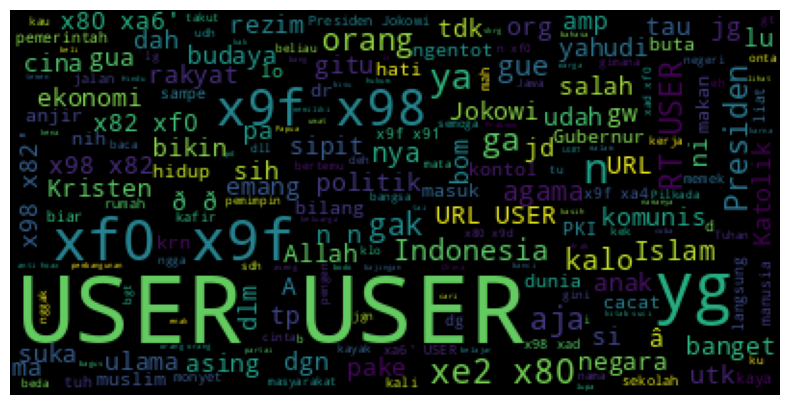

In [ ]:
#label 0 atau tidak depresi
cloud0 = wordcloud.generate(data.loc[data.HS==0, 'Tweet'].str.cat(sep='\n'))

plt.figure(figsize=(10,5))
plt.imshow(cloud0)
plt.axis("off")
plt.show()

#Data Preprocessing

Case Folding (Lower Case)

In [ ]:
data['lowercase'] = data['Tweet'].apply(lambda x: " ".join(word.lower() for word in x.split()))
data.head()

,Tweet,HS,word_count,num_char,lowercase
0,- disaat semua cowok berusaha melacak perhatia...,1,25,138,- disaat semua cowok berusaha melacak perhatia...
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,21,120,rt user: user siapa yang telat ngasih tau elu?...
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,37,254,"41. kadang aku berfikir, kenapa aku tetap perc..."
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,14,75,user user aku itu aku\n\nku tau matamu sipit t...
4,USER USER Kaum cebong kapir udah keliatan dong...,1,14,89,user user kaum cebong kapir udah keliatan dong...


Remove Punctuation

In [ ]:
data['punctuation'] = data['lowercase'].str.replace('[^\w\s\d]',' ')
data.head()

<ipython-input-16-ec3b89fa17dd>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data['punctuation'] = data['lowercase'].str.replace('[^\w\s\d]',' ')


,Tweet,HS,word_count,num_char,lowercase,punctuation
0,- disaat semua cowok berusaha melacak perhatia...,1,25,138,- disaat semua cowok berusaha melacak perhatia...,disaat semua cowok berusaha melacak perhatia...
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,21,120,rt user: user siapa yang telat ngasih tau elu?...,rt user user siapa yang telat ngasih tau elu ...
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,37,254,"41. kadang aku berfikir, kenapa aku tetap perc...",41 kadang aku berfikir kenapa aku tetap perc...
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,14,75,user user aku itu aku\n\nku tau matamu sipit t...,user user aku itu aku n nku tau matamu sipit t...
4,USER USER Kaum cebong kapir udah keliatan dong...,1,14,89,user user kaum cebong kapir udah keliatan dong...,user user kaum cebong kapir udah keliatan dong...


Slang Words (Using Alay Dictionary)

In [ ]:
alay_dict = pd.read_csv('/content/drive/MyDrive/indonesian hate speech/new_kamusalay.csv', encoding='latin-1', header=None)
alay_dict = alay_dict.rename(columns={0:'original',1:'replacement'})

In [ ]:
alay_dict

,original,replacement
0,anakjakartaasikasik,anak jakarta asyik asyik
1,pakcikdahtua,pak cik sudah tua
2,pakcikmudalagi,pak cik muda lagi
3,t3tapjokowi,tetap jokowi
4,3x,tiga kali
...,...,...
15162,mendikbud,menteri pendidikan dan kebudayaan
15163,mendag,menteri perdagangan
15164,menaker,menteri tenaga kerja
15165,memetwit,mentwit


In [ ]:
alay_dict_map = dict(zip(alay_dict['original'], alay_dict['replacement']))

In [ ]:
def normalize_alay(text):
  return " ".join([alay_dict_map[word] if word in alay_dict_map else word for word in text.split()])

In [ ]:
data['normalize_alay'] = data['punctuation'].map(lambda x: normalize_alay(x))

In [ ]:
data.head()

,Tweet,HS,word_count,num_char,lowercase,punctuation,normalize_alay
0,- disaat semua cowok berusaha melacak perhatia...,1,25,138,- disaat semua cowok berusaha melacak perhatia...,disaat semua cowok berusaha melacak perhatia...,di saat semua cowok berusaha melacak perhatian...
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,21,120,rt user: user siapa yang telat ngasih tau elu?...,rt user user siapa yang telat ngasih tau elu ...,rt pengguna pengguna siapa yang telat memberi ...
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,37,254,"41. kadang aku berfikir, kenapa aku tetap perc...",41 kadang aku berfikir kenapa aku tetap perc...,41 kadang aku berpikir kenapa aku tetap percay...
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,14,75,user user aku itu aku\n\nku tau matamu sipit t...,user user aku itu aku n nku tau matamu sipit t...,pengguna pengguna aku itu aku dan ku tau matam...
4,USER USER Kaum cebong kapir udah keliatan dong...,1,14,89,user user kaum cebong kapir udah keliatan dong...,user user kaum cebong kapir udah keliatan dong...,pengguna pengguna kaum cebong kafir sudah keli...


Remove Stopwords

In [ ]:
data['stopwords'] = data['normalize_alay'].apply(lambda x:" ".join(word for word in x.split() if word not in stop_words))
data.head()

,Tweet,HS,word_count,num_char,lowercase,punctuation,normalize_alay,stopwords
0,- disaat semua cowok berusaha melacak perhatia...,1,25,138,- disaat semua cowok berusaha melacak perhatia...,disaat semua cowok berusaha melacak perhatia...,di saat semua cowok berusaha melacak perhatian...,cowok berusaha melacak perhatian gue lantas re...
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,21,120,rt user: user siapa yang telat ngasih tau elu?...,rt user user siapa yang telat ngasih tau elu ...,rt pengguna pengguna siapa yang telat memberi ...,rt pengguna pengguna telat tau edan sarap gue ...
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,37,254,"41. kadang aku berfikir, kenapa aku tetap perc...",41 kadang aku berfikir kenapa aku tetap perc...,41 kadang aku berpikir kenapa aku tetap percay...,41 kadang berpikir percaya tuhan jatuh berkali...
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,14,75,user user aku itu aku\n\nku tau matamu sipit t...,user user aku itu aku n nku tau matamu sipit t...,pengguna pengguna aku itu aku dan ku tau matam...,pengguna pengguna ku tau matamu sipit
4,USER USER Kaum cebong kapir udah keliatan dong...,1,14,89,user user kaum cebong kapir udah keliatan dong...,user user kaum cebong kapir udah keliatan dong...,pengguna pengguna kaum cebong kafir sudah keli...,pengguna pengguna kaum cebong kafir dongoknya ...


In [ ]:
#lihat kata yang paling sering muncul
pd.Series(" ".join(data['stopwords']).split()).value_counts()[:50]

pengguna     16334
xf0           2109
x9f           2094
indonesia     1674
x98           1636
presiden      1509
orang         1433
gue           1182
ya            1181
jokowi        1164
rt             964
islam          886
locator        820
uniform        820
resource       820
sih            813
agama          766
partai         746
asing          738
komunis        729
x82            691
rakyat         681
nya            643
xe2            642
x80            637
2019           633
cina           623
negara         569
cebong         550
daerah         548
kayak          534
ganti          503
gubernur       474
banget         473
nih            461
kepala         435
kerja          407
kristen        395
ahok           389
kafir          373
ulama          372
rezim          366
wkwk           361
anak           348
tau            345
pilihan        342
pakai          339
iya            338
amp            337
allah          334
dtype: int64

Stemming

In [ ]:
!pip install PySastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.6/210.6 kB 9.6 MB/s eta 0:00:00


In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [ ]:
#function untuk proses stemming
def stemming(text):
  return stemmer.stem(text)

In [ ]:
data['stemming'] = data['stopwords'].map(lambda x: stemming(x))
data.head()

,Tweet,HS,word_count,num_char,lowercase,punctuation,normalize_alay,stopwords,stemming
0,- disaat semua cowok berusaha melacak perhatia...,1,25,138,- disaat semua cowok berusaha melacak perhatia...,disaat semua cowok berusaha melacak perhatia...,di saat semua cowok berusaha melacak perhatian...,cowok berusaha melacak perhatian gue lantas re...,cowok usaha lacak perhati gue lantas remeh per...
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,21,120,rt user: user siapa yang telat ngasih tau elu?...,rt user user siapa yang telat ngasih tau elu ...,rt pengguna pengguna siapa yang telat memberi ...,rt pengguna pengguna telat tau edan sarap gue ...,rt guna guna telat tau edan sarap gue gaul cig...
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,37,254,"41. kadang aku berfikir, kenapa aku tetap perc...",41 kadang aku berfikir kenapa aku tetap perc...,41 kadang aku berpikir kenapa aku tetap percay...,41 kadang berpikir percaya tuhan jatuh berkali...,41 kadang pikir percaya tuhan jatuh kali kali ...
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,14,75,user user aku itu aku\n\nku tau matamu sipit t...,user user aku itu aku n nku tau matamu sipit t...,pengguna pengguna aku itu aku dan ku tau matam...,pengguna pengguna ku tau matamu sipit,guna guna ku tau mata sipit
4,USER USER Kaum cebong kapir udah keliatan dong...,1,14,89,user user kaum cebong kapir udah keliatan dong...,user user kaum cebong kapir udah keliatan dong...,pengguna pengguna kaum cebong kafir sudah keli...,pengguna pengguna kaum cebong kafir dongoknya ...,guna guna kaum cebong kafir dongok dungu haha


In [ ]:
dataset = data[['stemming','HS']]
dataset.to_csv('Indonesia HS.csv')

#Tokenizer & Pad Sequence

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/indonesian hate speech/Augment IndonesiaHS_ind.csv',encoding='latin')
dataset.head()

,stemming,label
0,pakai wkwk wkwk yerin asuh sipit kotaro ya,0
1,investasi terus modal ekonomi on road investor...,0
2,"Perilaku tangkap tangan polisi langkah, turunk...",1
3,menggunakan Anda untuk memuji kata-kata asing ...,1
4,pakai mbok tolol tau tolol ahlinya,1


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55608 entries, 0 to 55607
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   stemming  55599 non-null  object
 1   label     55608 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 869.0+ KB


In [ ]:
dataset.rename(columns = {'stemming': 'Tweet'}, inplace=True)
dataset.head()

,Tweet,label
0,pakai wkwk wkwk yerin asuh sipit kotaro ya,0
1,investasi terus modal ekonomi on road investor...,0
2,"Perilaku tangkap tangan polisi langkah, turunk...",1
3,menggunakan Anda untuk memuji kata-kata asing ...,1
4,pakai mbok tolol tau tolol ahlinya,1


In [ ]:
dataset['label'].fillna(0,inplace=True)

In [ ]:
dataset['Tweet'] = dataset['Tweet'].astype('str')

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55608 entries, 0 to 55607
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Tweet   55608 non-null  object
 1   label   55608 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 869.0+ KB


In [ ]:
x = dataset['Tweet']
y = dataset['label']

In [ ]:
x.head()

0           pakai wkwk wkwk yerin asuh sipit kotaro ya
1    investasi terus modal ekonomi on road investor...
2    Perilaku tangkap tangan polisi langkah, turunk...
3    menggunakan Anda untuk memuji kata-kata asing ...
4                   pakai mbok tolol tau tolol ahlinya
Name: Tweet, dtype: object

In [ ]:
y.head()

0    0
1    0
2    1
3    1
4    1
Name: label, dtype: int64

In [ ]:
tokenizer = Tokenizer(num_words=10000, oov_token='<UNK>')
tokenizer.fit_on_texts(x)
tokenizer.word_index

{'<UNK>': 1,
 'untuk': 2,
 'guna': 3,
 'xf0': 4,
 'x9f': 5,
 'yang': 6,
 'gunakan': 7,
 'orang': 8,
 'x98': 9,
 'indonesia': 10,
 'presiden': 11,
 'saya': 12,
 'jokowi': 13,
 'pakai': 14,
 'menggunakan': 15,
 'rt': 16,
 'di': 17,
 'itu': 18,
 'islam': 19,
 'ya': 20,
 'bodoh': 21,
 'agama': 22,
 'x82': 23,
 '2019': 24,
 'dengan': 25,
 'komunis': 26,
 'partai': 27,
 'negara': 28,
 'asing': 29,
 'fungsi': 30,
 'x80': 31,
 'xe2': 32,
 'seperti': 33,
 'rakyat': 34,
 'dari': 35,
 'locator': 36,
 'dan': 37,
 'seragam': 38,
 'benar': 39,
 'sumber': 40,
 'adalah': 41,
 'ke': 42,
 'ahok': 43,
 'anak': 44,
 'daya': 45,
 'gubernur': 46,
 'resource': 47,
 'daerah': 48,
 'ganti': 49,
 'rezim': 50,
 'kafir': 51,
 'kepala': 52,
 'kristen': 53,
 'prabowo': 54,
 'cina': 55,
 'muslim': 56,
 'penggunaan': 57,
 'salah': 58,
 'pencari': 59,
 'uniform': 60,
 'anda': 61,
 'haha': 62,
 'ekonomi': 63,
 'allah': 64,
 'politik': 65,
 'digunakan': 66,
 'kerja': 67,
 'antek': 68,
 'bajingan': 69,
 'aku': 70,
 'anji

In [ ]:
def get_sequences(tokenizer, tweets):
  sequences = tokenizer.texts_to_sequences(tweets)
  padded_sequences = pad_sequences(sequences, truncating='post', maxlen=40, padding='post')
  return padded_sequences

In [ ]:
padded_train_sequences = get_sequences(tokenizer, x)

In [ ]:
classes = set(y)
classes_to_index = dict((c,i) for i, c in enumerate(classes))
index_to_classes = dict((v,k) for k, v in classes_to_index.items())
names_to_ids_training = lambda labels: np.array([classes_to_index.get(x) for x in y])
labels = names_to_ids_training(y)

#Split Data

In [ ]:
# Split training data to train and test set
x_train, x_test, y_train, y_test = train_test_split(padded_train_sequences, labels, test_size=0.2, shuffle= True, random_state=10)

In [ ]:
from tensorflow.keras.utils import to_categorical
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

#Transformers

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
class TokenAndPositionEmbedding(layers.Layer):
    def __init__(self, maxlen, vocab_size, embed_dim):
        super(TokenAndPositionEmbedding, self).__init__()
        self.token_emb = layers.Embedding(input_dim=vocab_size, output_dim=embed_dim)
        self.pos_emb = layers.Embedding(input_dim=maxlen, output_dim=embed_dim)

    def call(self, x):
        maxlen = tf.shape(x)[-1]
        positions = tf.range(start=0, limit=maxlen, delta=1)
        positions = self.pos_emb(positions)
        x = self.token_emb(x)
        return x + positions

class TransformerBlock(layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super(TransformerBlock, self).__init__()
        self.att = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.ffn = keras.Sequential(
            [layers.Dense(ff_dim, activation="relu"), layers.Dense(embed_dim),]
        )
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = layers.Dropout(rate)
        self.dropout2 = layers.Dropout(rate)



    def call(self, inputs, training):
        attn_output = self.att(inputs, inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)

In [ ]:
embed_dim = 32  # Embedding size for each token
num_heads = 2  # Number of attention heads
ff_dim = 32  # Hidden layer size in feed forward network inside transformer
maxlen = 40
vocab_size = 10000

inputs = layers.Input(shape=(maxlen,))
embedding_layer = TokenAndPositionEmbedding(maxlen, vocab_size, embed_dim)
x = embedding_layer(inputs)
transformer_block = TransformerBlock(embed_dim, num_heads, ff_dim)
x = transformer_block(x)
x = layers.SpatialDropout1D(0.5)(x)
x = layers.Flatten()(x)
#x = layers.GlobalAveragePooling1D()(x)
x = layers.Dense(20, activation="selu")(x)
x = layers.Dropout(0.3)(x)
x = layers.Dense(20)(x)
x = layers.LeakyReLU(alpha=0.1)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(len(y_train_cat[0]), activation="sigmoid")(x)

model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.compile(
    optimizer=Adam(learning_rate = 1e-5), loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 40)]              0         
                                                                 
 token_and_position_embeddin  (None, 40, 32)           321280    
 g (TokenAndPositionEmbeddin                                     
 g)                                                              
                                                                 
 transformer_block (Transfor  (None, 40, 32)           10656     
 merBlock)                                                       
                                                                 
 spatial_dropout1d (SpatialD  (None, 40, 32)           0         
 ropout1D)                                                       
                                                                 
 flatten (Flatten)           (None, 1280)              0     

In [ ]:
num_epochs = 70
history = model.fit(x_train, y_train, validation_split=0.2, batch_size=64, epochs=num_epochs)

Epoch 1/70
557/557 [==============================] - 29s 46ms/step - loss: 1.0373 - accuracy: 0.5045 - val_loss: 0.7018 - val_accuracy: 0.5153
Epoch 2/70
557/557 [==============================] - 25s 44ms/step - loss: 0.8041 - accuracy: 0.5079 - val_loss: 0.7016 - val_accuracy: 0.5057
Epoch 3/70
557/557 [==============================] - 25s 45ms/step - loss: 0.7801 - accuracy: 0.5047 - val_loss: 0.6987 - val_accuracy: 0.5028
Epoch 4/70
557/557 [==============================] - 25s 45ms/step - loss: 0.7668 - accuracy: 0.5030 - val_loss: 0.6981 - val_accuracy: 0.5029
Epoch 5/70
557/557 [==============================] - 24s 43ms/step - loss: 0.7535 - accuracy: 0.5111 - val_loss: 0.6965 - val_accuracy: 0.5044
Epoch 6/70
557/557 [==============================] - 24s 44ms/step - loss: 0.7487 - accuracy: 0.5073 - val_loss: 0.6964 - val_accuracy: 0.5030
Epoch 7/70
557/557 [==============================] - 25s 45ms/step - loss: 0.7437 - accuracy: 0.5122 - val_loss: 0.6953 - val_accuracy:

In [ ]:
def show_history(h):
  epochs_trained = len(h.history['loss'])
  plt.figure(figsize=(16, 6))

  plt.subplot(1,2,1)
  plt.title('Accuracy')
  plt.plot(range(0, epochs_trained), history.history.get('accuracy'),
           label='Training')
  plt.plot(range(0, epochs_trained), history.history.get('val_accuracy'),
           label='Validation')
  plt.ylim([0., 1.])
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()

  plt.subplot(1,2,2)
  plt.title('Loss')
  plt.plot(range(0, epochs_trained), history.history.get('loss'),
           label='Training')
  plt.plot(range(0, epochs_trained), history.history.get('val_loss'),
           label='Validation')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

show_history(history)

In [ ]:
model.save('/content/drive/MyDrive/indonesian hate speech/model_latihan.h5')

#Evaluation

In [ ]:
eval = model.evaluate(x_test,y_test)

In [ ]:
from tensorflow.keras.models import load_model
model = load_model('/content/drive/MyDrive/indonesian hate speech/model_latihan.h5', compile=False, custom_objects={'KerasLayer':hub.KerasLayer})

NameError: ignored

In [ ]:
y_pred_cat=model.predict(x_test)
y_pred_cat=np.argmax(y_pred_cat,axis=-1)
y_pred_cat=y_pred_cat.flatten()
y_test_cat=y_test_cat.flatten()

In [ ]:
y_pred_cat.shape

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
print(confusion_matrix(y_test.round(), y_pred_cat.round()))

In [ ]:
print(classification_report(y_test.round(), y_pred_cat.round()))

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test.round(), y_pred_cat.round()) .ravel()
Accuracy = (tp + tn) / (tp + fp + fn + tn)
print("Accuracy: ", Accuracy)
# Fraction of the true background that is correctly segmented
Precision = tp / (tp + fp)
print("Precision: ", Precision)
# Fraction of the segmented object that is correctly segmented
Precision = tp / (tp + fp)
print("Precision: ", Precision)
# Fraction of the true object that is correctly segmented
Recall = tp / (tp + fn)
print("Recall: ", Recall)
# Harmonic mean ofprecision and recall
F_measure = 2 * (Recall * Precision) / (Recall + Precision)
print("F1-score: ", F_measure)

##ROC Curve

In [ ]:
from sklearn.metrics import roc_curve, auc
preds = np.argmax(model.predict(test), axis=1)
plt.figure(figsize = (10,10))
for i in range(len(y_train_cat[0])):
  fpr, tpr, th = roc_curve(y_test[:,i], y_preds_cat[:,i])
  auc_score = auc(fpr, tpr)
  plt.plot(fpr,tpr, label = "AUC {} : {}".format(preds[i],auc_score))

plt.plot([0,1], [0,1], color="navy", lw=2, linestyle="--")
plt.xlim([0.0,1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Recevier operating Curve")
plt.legend(loc = 4)

In [ ]:
#ROC
from sklearn.metrics import roc_curve, auc
preds = np.argmax(model.predict(x_test), axis=1)
plt.figure(figsize = (10,10))
for i in range(len(y_train_cat[0][1])):
  fpr, tpr, th = roc_curve(y_test[:,i], y_pred_cat[:,i])
  auc_score = auc(fpr, tpr)
  plt.plot(fpr,tpr, label = "AUC {} : {}".format(preds[i],auc_score))

plt.plot([0,1], [0,1], color="navy", lw=2, linestyle="--")
plt.xlim([0.0,1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Recevier operating Curve")
plt.legend(loc = 4)

In [ ]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'y--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.plot(fpr, tpr, label = "AUC {} : {}".format(1, auc_score))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc=4)